In [1]:
# Imports

import plotly.graph_objects as go
import plotly.express as px
import dash
from dash.dependencies import Input, Output
import dash_html_components as html
import dash_core_components as dcc
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64

import warnings
warnings.filterwarnings("ignore")
warnings.warn("second example of warning!")

In [2]:
# Reading the Data

df = pd.read_csv("/Users/sandeepreddy/Desktop/My_Final_Pro/Levels_Fyi_Salary_Data.csv")

In [3]:
# Making a copy 

data = df.copy()

In [4]:
#data.head()

In [5]:
# Shape (Rows, Columns)

data.shape

(62642, 29)

In [6]:
d = df.copy()

In [7]:
# Changing the timestamp column to datetime format

d['timestamp'] = pd.to_datetime(d['timestamp'])

In [8]:
# Getting the Years the data has

set(d['timestamp'].dt.year)

{2017, 2018, 2019, 2020, 2021}

In [9]:
# Getting the No.of Samples the data has per year

d['timestamp'].dt.year.value_counts()

2020    23946
2021    23427
2019    11189
2018     3895
2017      185
Name: timestamp, dtype: int64

In [10]:
# Columns of the data

data.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [11]:
# getting the list of the job roles from the df
list_jobs = set(data['title'])

In [12]:
# Total No.of Companies

len(set(data.company))

1632

In [13]:
# Getting the No.of jobs per Company

data.company.value_counts()

Amazon                      8126
Microsoft                   5216
Google                      4330
Facebook                    2990
Apple                       2028
                            ... 
Samsung research America       1
Bny Mellon                     1
yelp                           1
Bloomberg lp                   1
tableau software               1
Name: company, Length: 1631, dtype: int64

In [14]:
# Getting the No.of Jobs per Job Title

data.title.value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [15]:
# Getting the No.of Jobs per Location

data.location.value_counts()

Seattle, WA                      8701
San Francisco, CA                6797
New York, NY                     4562
Redmond, WA                      2649
Mountain View, CA                2275
                                 ... 
San Fernando, LB, Philippines       1
Suwanee, GA                         1
Oxford, MS                          1
Wayne, PA                           1
Hilbert, WI                         1
Name: location, Length: 1050, dtype: int64

In [16]:
def firstLetters(str):
  """
  A Function to get the first letters of the job titles
  """
  result = ""
  v = True                                    # Traverse the string.
  for i in range(len(str)):
      if (str[i] == ' '):
        v = True                     # If it is space, set v as true.
      elif (str[i] != ' ' and v == True):     # Else check if v is true or not.
        result += (str[i])                  # If true, copy character in output
        v = False                           # string and set v as false.
  return result
kw = []
jobs = []
for i in list_jobs:
  jobs.append(i)                                # function to make a list of job titles
  kw.append(firstLetters(i).upper())

In [17]:
jobs

['Hardware Engineer',
 'Product Manager',
 'Marketing',
 'Software Engineering Manager',
 'Software Engineer',
 'Management Consultant',
 'Recruiter',
 'Sales',
 'Data Scientist',
 'Solution Architect',
 'Human Resources',
 'Business Analyst',
 'Product Designer',
 'Mechanical Engineer',
 'Technical Program Manager']

In [18]:
kw

['HE',
 'PM',
 'M',
 'SEM',
 'SE',
 'MC',
 'R',
 'S',
 'DS',
 'SA',
 'HR',
 'BA',
 'PD',
 'ME',
 'TPM']

In [19]:
j_k = dict(zip(jobs,kw))

In [20]:
j_k

{'Hardware Engineer': 'HE',
 'Product Manager': 'PM',
 'Marketing': 'M',
 'Software Engineering Manager': 'SEM',
 'Software Engineer': 'SE',
 'Management Consultant': 'MC',
 'Recruiter': 'R',
 'Sales': 'S',
 'Data Scientist': 'DS',
 'Solution Architect': 'SA',
 'Human Resources': 'HR',
 'Business Analyst': 'BA',
 'Product Designer': 'PD',
 'Mechanical Engineer': 'ME',
 'Technical Program Manager': 'TPM'}

In [21]:
option = []
for k,v in j_k.items():
    option.append({'label':k,'value' :v})

In [22]:
#option

In [23]:
# Creating Seperate dataframes for each job title

data_ba = data[data['title']=='Business Analyst']
data_ds = data[data['title']=='Data Scientist']
data_he = data[data['title']=='Hardware Engineer']
data_hr = data[data['title']=='Human Resources']
data_mc = data[data['title']=='Management Consultant']
data_m = data[data['title']=='Marketing']
data_me = data[data['title']=='Mechanical Engineer']
data_pd = data[data['title']=='Product Designer']
data_pm = data[data['title']=='Product Manager']
data_r = data[data['title']=='Recruiter']
data_s = data[data['title']=='Sales']
data_se = data[data['title']=='Software Engineer']
data_sem = data[data['title']=='Software Engineering Manager']
data_sa = data[data['title']=='Solution Architect']
data_tpm = data[data['title']=='Technical Program Manager']

In [24]:
# Renaming the Column name

data_ba.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_ds.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_he.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_hr.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_mc.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_m.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_me.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_pd.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_pm.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_r.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_s.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_se.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_sem.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_sa.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)
data_tpm.rename(columns={'totalyearlycompensation':'Salaries'}, inplace=True)

In [25]:
# Removing the rows with (yearsofexperience).value_counts()=1 

data_ba = data_ba[(data_ba['yearsofexperience']!=18.0)&(data_ba['yearsofexperience']!=24.0)&(data_ba['yearsofexperience']!=23.0)&(data_ba['yearsofexperience']!=45.0)&(data_ba['yearsofexperience']!=19.0)&(data_ba['yearsofexperience']!=35.0)&(data_ba['yearsofexperience']!=31.0)&(data_ba['yearsofexperience']!=25.0)&(data_ba['yearsofexperience']!=21.0)]
data_ds = data_ds[(data_ds['yearsofexperience']!=19.0)&(data_ds['yearsofexperience']!=26.0)&(data_ds['yearsofexperience']!=30.0)&(data_ds['yearsofexperience']!=21.0)&(data_ds['yearsofexperience']!=34.0)]
data_he = data_he[(data_he['yearsofexperience']!=29.0)&(data_he['yearsofexperience']!=34.0)&(data_he['yearsofexperience']!=27.0)&(data_he['yearsofexperience']!=32.0)]
data_hr = data_hr[(data_hr['yearsofexperience']!=29.0)&(data_hr['yearsofexperience']!=22.0)&(data_hr['yearsofexperience']!=24.0)&(data_hr['yearsofexperience']!=32.0)&(data_hr['yearsofexperience']!=27.0)&(data_hr['yearsofexperience']!=28.0)&(data_hr['yearsofexperience']!=26.0)&(data_hr['yearsofexperience']!=40.0)]
data_mc = data_mc[(data_mc['yearsofexperience']!=30.0)&(data_mc['yearsofexperience']!=33.0)]
data_m = data_m[(data_m['yearsofexperience']!=35.0)&(data_m['yearsofexperience']!=23.0)&(data_m['yearsofexperience']!=24.0)]
data_me = data_me[(data_me['yearsofexperience']!=21.0)&(data_me['yearsofexperience']!=19.0)&(data_me['yearsofexperience']!=28.0)&(data_me['yearsofexperience']!=17.0)&(data_me['yearsofexperience']!=16.0)&(data_me['yearsofexperience']!=22.0)&(data_me['yearsofexperience']!=25.0)]
data_pd = data_pd[(data_pd['yearsofexperience']!=28.0)&(data_pd['yearsofexperience']!=69.0)]
data_pm = data_pm[(data_pm['yearsofexperience']!=38.0)&(data_pm['yearsofexperience']!=29.0)&(data_pm['yearsofexperience']!=35.0)&(data_pm['yearsofexperience']!=6.5)&(data_pm['yearsofexperience']!=33.0)]
data_r = data_r[(data_r['yearsofexperience']!=32.0)&(data_r['yearsofexperience']!=19.0)&(data_r['yearsofexperience']!=29.0)&(data_r['yearsofexperience']!=26.0)]
data_s = data_s[(data_s['yearsofexperience']!=24.0)&(data_s['yearsofexperience']!=30.0)]
data_se = data_se[(data_se['yearsofexperience']!=0.30)&(data_se['yearsofexperience']!=0.58)&(data_se['yearsofexperience']!=6.75)&(data_se['yearsofexperience']!=6.50)&(data_se['yearsofexperience']!=10.50)&(data_se['yearsofexperience']!=1.60)&(data_se['yearsofexperience']!=0.60)&(data_se['yearsofexperience']!=1.40)]
data_sem = data_sem[(data_sem['yearsofexperience']!=40.0)&(data_sem['yearsofexperience']!=31.0)&(data_sem['yearsofexperience']!=36.0)&(data_sem['yearsofexperience']!=39.0)&(data_sem['yearsofexperience']!=0.0)&(data_sem['yearsofexperience']!=33.0)]
data_sa = data_sa[(data_sa['yearsofexperience']!=31.0)&(data_sa['yearsofexperience']!=28.0)&(data_sa['yearsofexperience']!=32.0)&(data_sa['yearsofexperience']!=35.0)]
data_tpm = data_tpm[(data_tpm['yearsofexperience']!=28.0)&(data_tpm['yearsofexperience']!=31.0)&(data_tpm['yearsofexperience']!=29.0)&(data_tpm['yearsofexperience']!=38.0)]

# For Every Job Role, created the Minimum, Maximum and Average Salaries.
# Making the Plot to Visualize
# Saving the Plot locally

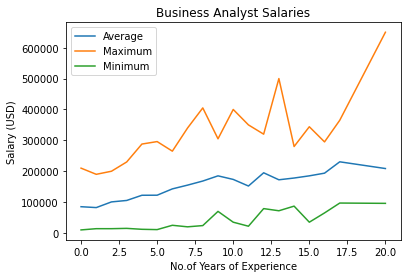

In [26]:
avg_ba_info = data_ba.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_ba_info = data_ba.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_ba_info = data_ba.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_ba_info = avg_ba_info.reset_index()
max_ba_info = max_ba_info.reset_index()
min_ba_info = min_ba_info.reset_index()

avg_ba_info.reset_index(drop=True, inplace=True)
max_ba_info.reset_index(drop=True, inplace=True)
min_ba_info.reset_index(drop=True, inplace=True)

ba_sal = pd.concat([avg_ba_info, max_ba_info,min_ba_info], axis=1)

ba_sal = ba_sal.loc[:,~ba_sal.columns.duplicated()]

plt.plot(ba_sal.yearsofexperience,ba_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Business Analyst Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/ba.png")
plt.show()

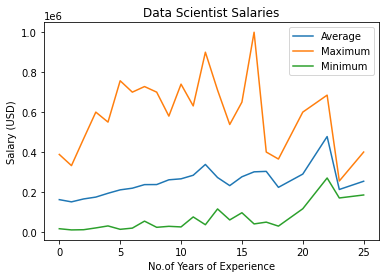

In [27]:
avg_ds_info = data_ds.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_ds_info = data_ds.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_ds_info = data_ds.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_ds_info = avg_ds_info.reset_index()
max_ds_info = max_ds_info.reset_index()
min_ds_info = min_ds_info.reset_index()

avg_ds_info.reset_index(drop=True, inplace=True)
max_ds_info.reset_index(drop=True, inplace=True)
min_ds_info.reset_index(drop=True, inplace=True)

ds_sal = pd.concat([avg_ds_info, max_ds_info,min_ds_info], axis=1)

ds_sal = ds_sal.loc[:,~ds_sal.columns.duplicated()]

plt.plot(ds_sal.yearsofexperience,ds_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Data Scientist Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/ds.png")
plt.show()

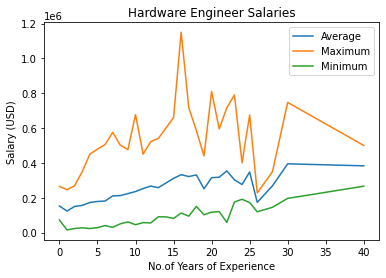

In [28]:
avg_he_info = data_he.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_he_info = data_he.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_he_info = data_he.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_he_info = avg_he_info.reset_index()
max_he_info = max_he_info.reset_index()
min_he_info = min_he_info.reset_index()

avg_he_info.reset_index(drop=True, inplace=True)
max_he_info.reset_index(drop=True, inplace=True)
min_he_info.reset_index(drop=True, inplace=True)

he_sal = pd.concat([avg_he_info, max_he_info,min_he_info], axis=1)

he_sal = he_sal.loc[:,~he_sal.columns.duplicated()]

plt.plot(he_sal.yearsofexperience,he_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Hardware Engineer Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/he.png")
plt.show()

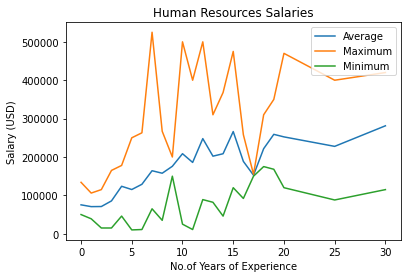

In [29]:
avg_hr_info = data_hr.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_hr_info = data_hr.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_hr_info = data_hr.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_hr_info = avg_hr_info.reset_index()
max_hr_info = max_hr_info.reset_index()
min_hr_info = min_hr_info.reset_index()

avg_hr_info.reset_index(drop=True, inplace=True)
max_hr_info.reset_index(drop=True, inplace=True)
min_hr_info.reset_index(drop=True, inplace=True)

hr_sal = pd.concat([avg_hr_info, max_hr_info,min_hr_info], axis=1)

hr_sal = hr_sal.loc[:,~hr_sal.columns.duplicated()]

plt.plot(hr_sal.yearsofexperience,hr_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Human Resources Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/hr.png")
plt.show()

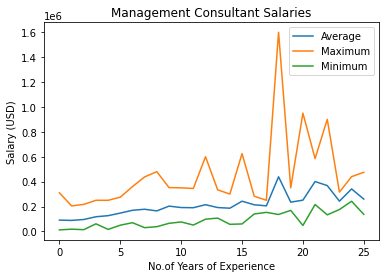

In [30]:
avg_mc_info = data_mc.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_mc_info = data_mc.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_mc_info = data_mc.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_mc_info = avg_mc_info.reset_index()
max_mc_info = max_mc_info.reset_index()
min_mc_info = min_mc_info.reset_index()

avg_mc_info.reset_index(drop=True, inplace=True)
max_mc_info.reset_index(drop=True, inplace=True)
min_mc_info.reset_index(drop=True, inplace=True)

mc_sal = pd.concat([avg_mc_info, max_mc_info,min_mc_info], axis=1)

mc_sal = mc_sal.loc[:,~mc_sal.columns.duplicated()]

plt.plot(mc_sal.yearsofexperience,mc_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Management Consultant Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/mc.png")
plt.show()

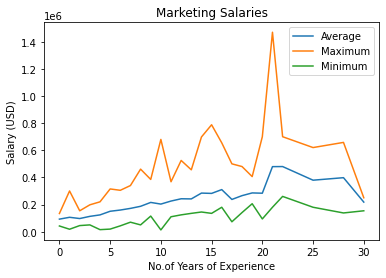

In [31]:
avg_m_info = data_m.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_m_info = data_m.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_m_info = data_m.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_m_info = avg_m_info.reset_index()
max_m_info = max_m_info.reset_index()
min_m_info = min_m_info.reset_index()

avg_m_info.reset_index(drop=True, inplace=True)
max_m_info.reset_index(drop=True, inplace=True)
min_m_info.reset_index(drop=True, inplace=True)

m_sal = pd.concat([avg_m_info, max_m_info,min_m_info], axis=1)

m_sal = m_sal.loc[:,~m_sal.columns.duplicated()]

plt.plot(m_sal.yearsofexperience,m_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Marketing Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/m.png")
plt.show()

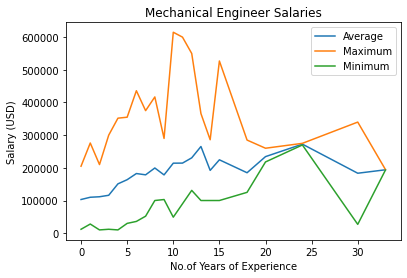

In [32]:
avg_me_info = data_me.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_me_info = data_me.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_me_info = data_me.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_me_info = avg_me_info.reset_index()
max_me_info = max_me_info.reset_index()
min_me_info = min_me_info.reset_index()

avg_me_info.reset_index(drop=True, inplace=True)
max_me_info.reset_index(drop=True, inplace=True)
min_me_info.reset_index(drop=True, inplace=True)

me_sal = pd.concat([avg_me_info, max_me_info,min_me_info], axis=1)

me_sal = me_sal.loc[:,~me_sal.columns.duplicated()]

plt.plot(me_sal.yearsofexperience,me_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Mechanical Engineer Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/me.png")
plt.show()

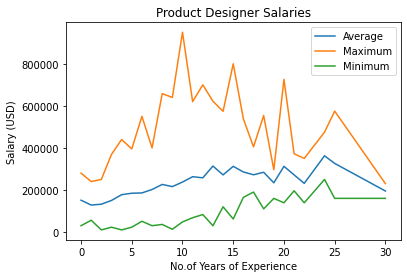

In [33]:
avg_pd_info = data_pd.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_pd_info = data_pd.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_pd_info = data_pd.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_pd_info = avg_pd_info.reset_index()
max_pd_info = max_pd_info.reset_index()
min_pd_info = min_pd_info.reset_index()

avg_pd_info.reset_index(drop=True, inplace=True)
max_pd_info.reset_index(drop=True, inplace=True)
min_pd_info.reset_index(drop=True, inplace=True)

pd_sal = pd.concat([avg_pd_info, max_pd_info,min_pd_info], axis=1)

pd_sal = pd_sal.loc[:,~pd_sal.columns.duplicated()]

plt.plot(pd_sal.yearsofexperience,pd_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Product Designer Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/pd.png")
plt.show()

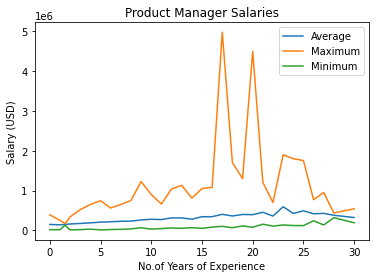

In [34]:
avg_pm_info = data_pm.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_pm_info = data_pm.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_pm_info = data_pm.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_pm_info = avg_pm_info.reset_index()
max_pm_info = max_pm_info.reset_index()
min_pm_info = min_pm_info.reset_index()

avg_pm_info.reset_index(drop=True, inplace=True)
max_pm_info.reset_index(drop=True, inplace=True)
min_pm_info.reset_index(drop=True, inplace=True)

pm_sal = pd.concat([avg_pm_info, max_pm_info,min_pm_info], axis=1)

pm_sal = pm_sal.loc[:,~pm_sal.columns.duplicated()]

plt.plot(pm_sal.yearsofexperience,pm_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Product Manager Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/pm.png")
plt.show()

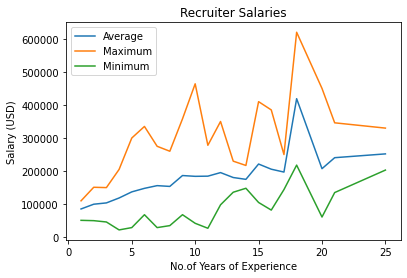

In [35]:
avg_r_info = data_r.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_r_info = data_r.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_r_info = data_r.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_r_info = avg_r_info.reset_index()
max_r_info = max_r_info.reset_index()
min_r_info = min_r_info.reset_index()

avg_r_info.reset_index(drop=True, inplace=True)
max_r_info.reset_index(drop=True, inplace=True)
min_r_info.reset_index(drop=True, inplace=True)

r_sal = pd.concat([avg_r_info, max_r_info,min_r_info], axis=1)

r_sal = r_sal.loc[:,~r_sal.columns.duplicated()]

plt.plot(r_sal.yearsofexperience,r_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Recruiter Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/r.png")
plt.show()

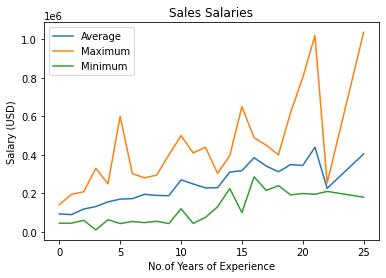

In [36]:
avg_s_info = data_s.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_s_info = data_s.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_s_info = data_s.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_s_info = avg_s_info.reset_index()
max_s_info = max_s_info.reset_index()
min_s_info = min_s_info.reset_index()

avg_s_info.reset_index(drop=True, inplace=True)
max_s_info.reset_index(drop=True, inplace=True)
min_s_info.reset_index(drop=True, inplace=True)

s_sal = pd.concat([avg_s_info, max_s_info,min_s_info], axis=1)

s_sal = s_sal.loc[:,~s_sal.columns.duplicated()]

plt.plot(s_sal.yearsofexperience,s_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Sales Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/s.png")
plt.show()

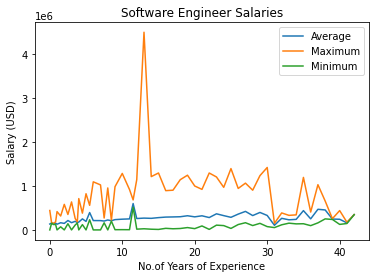

In [37]:
avg_se_info = data_se.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_se_info = data_se.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_se_info = data_se.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_se_info = avg_se_info.reset_index()
max_se_info = max_se_info.reset_index()
min_se_info = min_se_info.reset_index()

avg_se_info.reset_index(drop=True, inplace=True)
max_se_info.reset_index(drop=True, inplace=True)
min_se_info.reset_index(drop=True, inplace=True)

se_sal = pd.concat([avg_se_info, max_se_info,min_se_info], axis=1)

se_sal = se_sal.loc[:,~se_sal.columns.duplicated()]

plt.plot(se_sal.yearsofexperience,se_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Software Engineer Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/se.png")
plt.show()

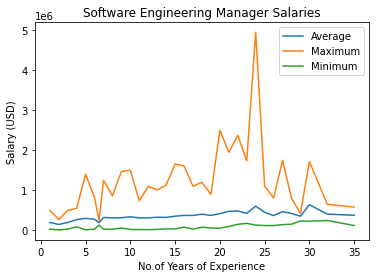

In [38]:
avg_sem_info = data_sem.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_sem_info = data_sem.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_sem_info = data_sem.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_sem_info = avg_sem_info.reset_index()
max_sem_info = max_sem_info.reset_index()
min_sem_info = min_sem_info.reset_index()

avg_sem_info.reset_index(drop=True, inplace=True)
max_sem_info.reset_index(drop=True, inplace=True)
min_sem_info.reset_index(drop=True, inplace=True)

sem_sal = pd.concat([avg_sem_info, max_sem_info,min_sem_info], axis=1)

sem_sal = sem_sal.loc[:,~sem_sal.columns.duplicated()]

plt.plot(sem_sal.yearsofexperience,sem_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Software Engineering Manager Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/sem.png")
plt.show()

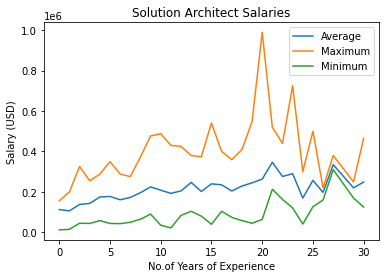

In [39]:
avg_sa_info = data_sa.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_sa_info = data_sa.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_sa_info = data_sa.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_sa_info = avg_sa_info.reset_index()
max_sa_info = max_sa_info.reset_index()
min_sa_info = min_sa_info.reset_index()

avg_sa_info.reset_index(drop=True, inplace=True)
max_sa_info.reset_index(drop=True, inplace=True)
min_sa_info.reset_index(drop=True, inplace=True)

sa_sal = pd.concat([avg_sa_info, max_sa_info,min_sa_info], axis=1)

sa_sal = sa_sal.loc[:,~sa_sal.columns.duplicated()]

plt.plot(sa_sal.yearsofexperience,sa_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Solution Architect Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/matplotlib_img/sa.png")
plt.show()

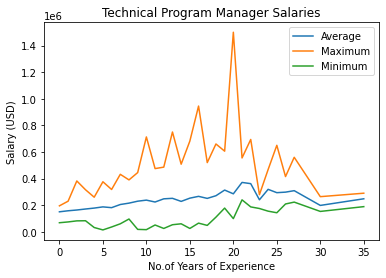

In [40]:
avg_tpm_info = data_tpm.groupby('yearsofexperience')['Salaries'].agg(['mean'])
max_tpm_info = data_tpm.groupby('yearsofexperience')['Salaries'].agg(['max'])
min_tpm_info = data_tpm.groupby('yearsofexperience')['Salaries'].agg(['min'])

avg_tpm_info = avg_tpm_info.reset_index()
max_tpm_info = max_tpm_info.reset_index()
min_tpm_info = min_tpm_info.reset_index()

avg_tpm_info.reset_index(drop=True, inplace=True)
max_tpm_info.reset_index(drop=True, inplace=True)
min_tpm_info.reset_index(drop=True, inplace=True)

tpm_sal = pd.concat([avg_tpm_info, max_tpm_info,min_tpm_info], axis=1)

tpm_sal = tpm_sal.loc[:,~tpm_sal.columns.duplicated()]

plt.plot(tpm_sal.yearsofexperience,tpm_sal[['mean','max','min']],label=['Average','Maximum','Minimum'])
plt.title('Technical Program Manager Salaries')
plt.xlabel('No.of Years of Experience')
plt.ylabel('Salary (USD)')
plt.legend()
plt.savefig("/Users/sandeepreddy/Desktop/tpm.png")
plt.show()

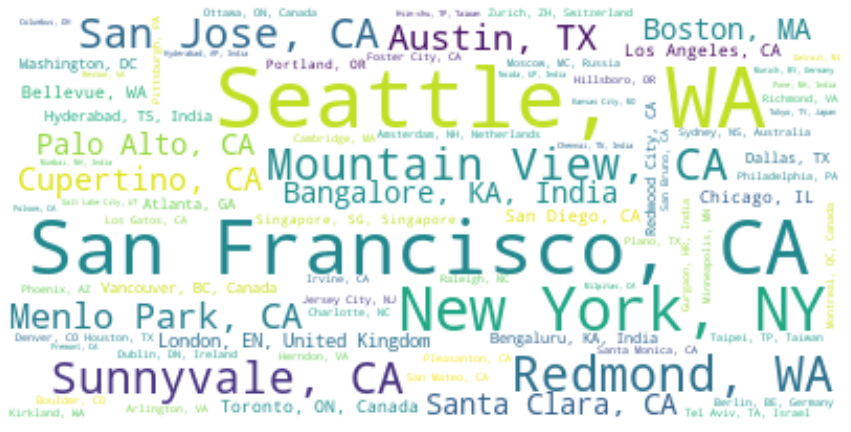

In [41]:
# Word Cloud For Job Locations

df = df[df['location'].isnull() == False]
counts = df['location'].value_counts()
counts.index = counts.index.map(str)
plt.figure(figsize=[15,15])
wordcloud = WordCloud(max_font_size=40,max_words=80,background_color="white").generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

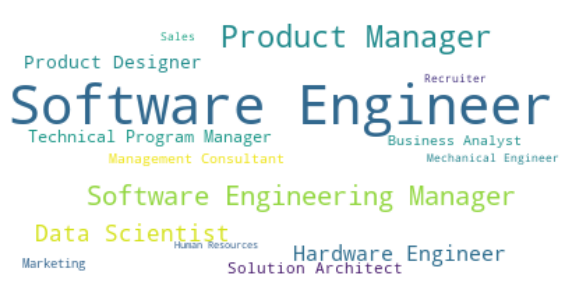

In [42]:
# Word Cloud For Job Titles

df = df[df['title'].isnull() == False]
counts = df['title'].value_counts()
counts.index = counts.index.map(str)
plt.figure(figsize=[10,10])
wordcloud = WordCloud(max_font_size=50,background_color="white").generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

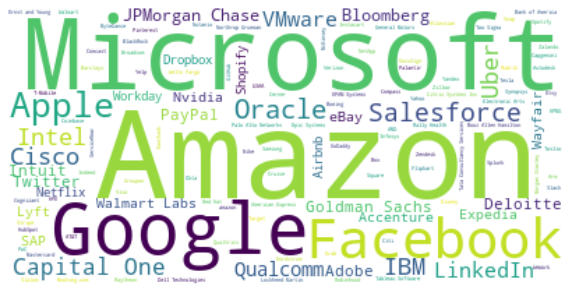

In [43]:
# Word Cloud For Company Names

df = df[df['company'].isnull() == False]
counts = df['company'].value_counts()
counts.index = counts.index.map(str)
plt.figure(figsize=[10,10])
wordcloud = WordCloud(background_color="white").generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Saving the wordclouds as images locally 

#wordcloud.to_file("/Users/sandeepreddy/Desktop/wordcloudscompanies.png")
#wordcloud.to_file("/Users/sandeepreddy/Desktop/wordcloudsjobs.png")
#wordcloud.to_file("/Users/sandeepreddy/Desktop/wordcloudslocations.png")

In [44]:
# Encoding the WordCloud images for the Dashboard

image_wc1 = '/Users/sandeepreddy/Desktop/wordclouds/wordcloudslocations.png'
encoded_wc1 = base64.b64encode(open(image_wc1, 'rb').read())

image_wc2 = '/Users/sandeepreddy/Desktop/wordclouds/wordcloudsjobs.png'
encoded_wc2 = base64.b64encode(open(image_wc2, 'rb').read())

image_wc3 = '/Users/sandeepreddy/Desktop/wordclouds/wordcloudscompanies.png'
encoded_wc3 = base64.b64encode(open(image_wc3, 'rb').read())

In [45]:
# Encoding the Matplotlib graphs of every role for the Dashboard 

image_tpm = '/Users/sandeepreddy/Desktop/matplotlib_img/tpm.png'
encoded_tpm = base64.b64encode(open(image_tpm, 'rb').read())

image_ba = '/Users/sandeepreddy/Desktop/matplotlib_img/ba.png'
encoded_ba = base64.b64encode(open(image_ba, 'rb').read())

image_ds = '/Users/sandeepreddy/Desktop/matplotlib_img/ds.png'
encoded_ds = base64.b64encode(open(image_ds, 'rb').read())

image_he = '/Users/sandeepreddy/Desktop/matplotlib_img/he.png'
encoded_he = base64.b64encode(open(image_he, 'rb').read())

image_hr = '/Users/sandeepreddy/Desktop/matplotlib_img/hr.png'
encoded_hr = base64.b64encode(open(image_hr, 'rb').read())

image_mc = '/Users/sandeepreddy/Desktop/matplotlib_img/mc.png'
encoded_mc = base64.b64encode(open(image_mc, 'rb').read())

image_m = '/Users/sandeepreddy/Desktop/matplotlib_img/m.png'
encoded_m = base64.b64encode(open(image_m, 'rb').read())

image_me = '/Users/sandeepreddy/Desktop/matplotlib_img/me.png'
encoded_me = base64.b64encode(open(image_me, 'rb').read())

image_pd = '/Users/sandeepreddy/Desktop/matplotlib_img/pd.png'
encoded_pd = base64.b64encode(open(image_pd, 'rb').read())

image_pm = '/Users/sandeepreddy/Desktop/matplotlib_img/pm.png'
encoded_pm = base64.b64encode(open(image_pm, 'rb').read())

image_r = '/Users/sandeepreddy/Desktop/matplotlib_img/r.png'
encoded_r = base64.b64encode(open(image_r, 'rb').read())

image_s = '/Users/sandeepreddy/Desktop/matplotlib_img/s.png'
encoded_s = base64.b64encode(open(image_s, 'rb').read())

image_se = '/Users/sandeepreddy/Desktop/matplotlib_img/se.png'
encoded_se = base64.b64encode(open(image_se, 'rb').read())

image_sem = '/Users/sandeepreddy/Desktop/matplotlib_img/sem.png'
encoded_sem = base64.b64encode(open(image_sem, 'rb').read())

image_sa = '/Users/sandeepreddy/Desktop/matplotlib_img/sa.png'
encoded_sa = base64.b64encode(open(image_sa, 'rb').read())

In [46]:
# Creating the dashboard 'app'

app = dash.Dash(__name__)

In [47]:
# App (dashboard) Layout

def make_break(num_breaks):
    br_list = [html.Br()] * num_breaks
    return br_list
            

app.layout = html.Div([
    
    html.H1("Final Project's Dashboard",style = {'color':'white', 'text-align':'center',
                                                'background-color': 'CornflowerBlue',
                                                'border-style': 'double','font-family':'Monaco'}),
    
    *make_break(2),
    
    html.Div([
        html.Div([
            html.P('Number Of Job Samples Per Year',style={'size':'30px','text-decoration':'underline'}),
            html.P('2017 : 185'),
            html.P('2018 : 3,894'),
            html.P('2019 : 11,187'),
            html.P('2020 : 23,944'),
            html.P('2021 : 23,427'),
        ])
    ],style={'text-align':'center','marginBottom': 50, 'marginTop': 25,'font-family':'Monaco'}),
    
    html.Div("Job Title's Salary Analysis (2017 - 2021)",style = {'text-align':'center','font-size': '25px',
                                                                  'color':'white','background-color': 'CornflowerBlue',
                                                                  'border-style': 'double','font-family':'Monaco'}),
    
    *make_break(2),
    
    html.Img(src='data:image/png;base64,{}'.format(encoded_tpm.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_ba.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_ds.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_he.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_hr.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_mc.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_m.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_me.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_pd.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_pm.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_r.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_s.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_se.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_sem.decode()),style={'padding':'10px'}),
    html.Img(src='data:image/png;base64,{}'.format(encoded_sa.decode()),style={'padding':'10px'}),
    
    *make_break(3),
    
    html.Div("Word Cloud - Job Locations",style = {'text-align':'center','font-size': '35px','color':'white',
                                                  'background-color': 'CornflowerBlue','border-style': 'double',
                                                   'font-family':'Monaco'}),
    *make_break(1),
    
    html.Img(src='data:image/png;base64,{}'.format(encoded_wc1.decode()),style={'padding':'50px 500px',
                                                                               'height':'50%','width':'50%'}),
    
    html.Div("Word Cloud - Job Titles",style = {'text-align':'center','font-size': '35px','color':'white',
                                                  'background-color': 'CornflowerBlue','border-style': 'double',
                                                   'font-family':'Monaco'}),
    *make_break(1),
    
    html.Img(src='data:image/png;base64,{}'.format(encoded_wc2.decode()),style={'padding':'50px 500px',
                                                                               'height':'50%','width':'50%'}),
    
    html.Div("Word Cloud - Job Companies",style = {'text-align':'center','font-size': '35px','color':'white',
                                                  'background-color': 'CornflowerBlue','border-style': 'double',
                                                   'font-family':'Monaco'}),
    *make_break(1),
    
    html.Img(src='data:image/png;base64,{}'.format(encoded_wc3.decode()),style={'padding':'50px 500px',
                                                                               'height':'50%','width':'50%'}),
    
    html.Div('Source:https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries',style={'color':'white', 
                                                                                               'text-align':'center',
                                                                                               'background-color': 'CornflowerBlue',
                                                                                               'border-style': 'double',
                                                                                               'font-family':'Monaco'})
])

In [48]:
if __name__ == '__main__':
    app.run_server()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Dec/2021 12:18:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2021 12:18:44] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2021 12:18:44] "GET /_favicon.ico?v=1.12.0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Dec/2021 12:18:44] "GET /_dash-layout HTTP/1.1" 200 -
